<b>Robins School of Business</b><br/>
<b>ECON 242 - Pandas Basics</b><br/>
<b>Spring 2022</b>
____________________________________________

<h1>Pandas: Calculated Columns -- Reading Questions (Answer Key)</h1>

<b>Before we begin let us import the pandas module for this question set.</b>

In [1]:
import pandas as pd
import numpy as np

<b>Q1: Find below code that cleans and combines countynames.csv, gdpdata.csv, and populationdata.csv files: </b>

In [2]:
#
# Loading in the countynames.csv dataset
#
df1 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/countynames.csv")

#
# Loading in the employmentdata.csv dataset
#
df2 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/gdpdata.csv")

# Dropping the null rows and converting the types
df2 = df2.dropna()
df2['gdp'] = df2['gdp'].astype('float64')
df2['gdp_gov'] = df2['gdp_gov'].astype('float64')

#
# Loading in the populationdata.csv dataset
#
df3 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/populationdata.csv")

# Dropping the null rows and converting the types
df3 = df3.dropna()
df3['population'] = df3['population'].astype('int64')

# Combining all three datasets using inner joins
df = pd.merge(df1, df2, how = 'inner', on = 'region_code')
df = pd.merge(df, df3, how = 'inner', on = 'region_code')

# Displaying the final result (there should be no null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2635 entries, 0 to 2634
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   region_code          2635 non-null   int64  
 1   county_name          2635 non-null   object 
 2   state_code           2635 non-null   object 
 3   gdp                  2635 non-null   float64
 4   gdp_goods            2635 non-null   float64
 5   gdp_services         2635 non-null   float64
 6   gdp_gov              2635 non-null   float64
 7   population           2635 non-null   int64  
 8   resident_population  2635 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 205.9+ KB


<b>a) Construct a new column that contains the GDP per capita, call it gdppc </b>

In [3]:
df['gdppc'] = 1000*df['gdp']/df['population'] #

<b>b) Find the five counties with the largest GDP per capita </b>

In [4]:
df.nlargest(5, 'gdppc')

,region_code,county_name,state_code,gdp,gdp_goods,gdp_services,gdp_gov,population,resident_population,gdppc
2272,48301,Loving County,TX,5868842.0,5851629.0,16065.0,1148.0,102,0.148,5.753767e+07
2277,48311,McMullen County,TX,2306017.0,2240425.0,53676.0,11917.0,662,0.731,3.483409e+06
2209,48173,Glasscock County,TX,3410699.0,3239041.0,161909.0,9748.0,1430,1.391,2.385104e+06
2348,48461,Upton County,TX,4754231.0,4566294.0,149499.0,38438.0,3634,3.637,1.308264e+06
2280,48317,Martin County,TX,6383456.0,6196723.0,140164.0,46569.0,5614,5.681,1.137060e+06


<b>c) Construct a new column which is equal to True if GDP per capita > 100000, otherwise it is False. Call the column highGDPPC </b>

In [5]:
df['highGDPPC'] = df['gdppc'] > 100000

<b>d) Construct a new column which is equal to 2 if GDP per capita > 100000, 1 if GDP per capita > 50000, and 0 otherwise. Call the column GDPPC_cat </b>

In [7]:
df['GDPPC_cat'] = np.select([df['gdppc']>100000, df['gdppc'] > 50000], [2, 1], 0)

<b>e) Convert the type of the GDPPC_cat column to be a categorical variable. </b>

In [8]:
df['GDPPC_cat'] = df['GDPPC_cat'].astype('category')

<b>f) Display how many counties fall in each of categories in GDPPC_cat </b>

In [9]:
df['GDPPC_cat'].value_counts()

0    1791
1     725
2     119
Name: GDPPC_cat, dtype: int64

<br><b>Q2: Let us create a simply dataframe below </b>

In [10]:
theDict = {'x1':['ABC','DEF','ghi', 'jkl'], \
           'x2':[1,2,3,4], \
           'x3':[5,2,6,4], \
           'x4':[1.0,3.4,7.2,5.6]} 

df = pd.DataFrame(theDict)

df

,x1,x2,x3,x4
0,ABC,1,5,1.0
1,DEF,2,2,3.4
2,ghi,3,6,7.2
3,jkl,4,4,5.6


<b>a) Add a new column x5 that contains the value 2 for all the rows</b>

In [11]:
df['x5'] = 2
df

,x1,x2,x3,x4,x5
0,ABC,1,5,1.0,2
1,DEF,2,2,3.4,2
2,ghi,3,6,7.2,2
3,jkl,4,4,5.6,2


<b>b) Make all the entries in column x1 lower case</b>

In [12]:
df['x1'] = df['x1'].str.lower()
df

,x1,x2,x3,x4,x5
0,abc,1,5,1.0,2
1,def,2,2,3.4,2
2,ghi,3,6,7.2,2
3,jkl,4,4,5.6,2


<b>c) Make a new column x6 that contains the first letter of the entries in x1</b>

In [13]:
df['x6'] = df['x1'].str[0]
df

,x1,x2,x3,x4,x5,x6
0,abc,1,5,1.0,2,a
1,def,2,2,3.4,2,d
2,ghi,3,6,7.2,2,g
3,jkl,4,4,5.6,2,j


<br><b>Q3: Let us create a simple dataframe below </b>

In [14]:
theDict = {'Day':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], \
           'Sales':[5, 8, 9, 10, 11, 4, 1, 6, 7, 9, 12, 12, 3, 2]} 

df = pd.DataFrame(theDict)

df

,Day,Sales
0,1,5
1,2,8
2,3,9
3,4,10
4,5,11
5,6,4
6,7,1
7,8,6
8,9,7
9,10,9


<b>a) Construct a new column that contains the 3-day moving average of sales. Use rolling means. Call the new column Sales_MA3</b>

In [15]:
df['Sales_MA3'] = df['Sales'].rolling(3).mean()
df

,Day,Sales,Sales_MA3
0,1,5,NaN
1,2,8,NaN
2,3,9,7.333333
3,4,10,9.000000
4,5,11,10.000000
5,6,4,8.333333
6,7,1,5.333333
7,8,6,3.666667
8,9,7,4.666667
9,10,9,7.333333


<b>b) Construct a new column that contains the 3-day moving average of sales. Use rolling means, but now centered. Call the new column Sales_MA3_Centered</b>

In [16]:
df['Sales_MA3_Centered'] = df['Sales'].rolling(3).mean().shift(-1)
df

,Day,Sales,Sales_MA3,Sales_MA3_Centered
0,1,5,NaN,NaN
1,2,8,NaN,7.333333
2,3,9,7.333333,9.000000
3,4,10,9.000000,10.000000
4,5,11,10.000000,8.333333
5,6,4,8.333333,5.333333
6,7,1,5.333333,3.666667
7,8,6,3.666667,4.666667
8,9,7,4.666667,7.333333
9,10,9,7.333333,9.333333


<b>b) Construct a new column that contains cummulative total sales over the period. Use expanding sums. Call the new column Total_Sales</b>

In [17]:
df['Total_Sales'] = df['Sales'].expanding(1).sum()
df

,Day,Sales,Sales_MA3,Sales_MA3_Centered,Total_Sales
0,1,5,NaN,NaN,5.0
1,2,8,NaN,7.333333,13.0
2,3,9,7.333333,9.000000,22.0
3,4,10,9.000000,10.000000,32.0
4,5,11,10.000000,8.333333,43.0
5,6,4,8.333333,5.333333,47.0
6,7,1,5.333333,3.666667,48.0
7,8,6,3.666667,4.666667,54.0
8,9,7,4.666667,7.333333,61.0
9,10,9,7.333333,9.333333,70.0


<b>c) Construct a new column that contains cummulative total sales over the period. Use the cumsum() function. Call the new column Total_Sales2</b>

In [18]:
df['Total_Sales2'] = df['Sales'].cumsum()
df

,Day,Sales,Sales_MA3,Sales_MA3_Centered,Total_Sales,Total_Sales2
0,1,5,NaN,NaN,5.0,5
1,2,8,NaN,7.333333,13.0,13
2,3,9,7.333333,9.000000,22.0,22
3,4,10,9.000000,10.000000,32.0,32
4,5,11,10.000000,8.333333,43.0,43
5,6,4,8.333333,5.333333,47.0,47
6,7,1,5.333333,3.666667,48.0,48
7,8,6,3.666667,4.666667,54.0,54
8,9,7,4.666667,7.333333,61.0,61
9,10,9,7.333333,9.333333,70.0,70


<b>e) Construct a new column that contains the daily change in sales (i.e. the change in sales from the previous day). Use the shift function. Call the new column Sales_Change</b>

In [19]:
df['Sales_Change'] = df['Sales'] - df['Sales'].shift(1)
df

,Day,Sales,Sales_MA3,Sales_MA3_Centered,Total_Sales,Total_Sales2,Sales_Change
0,1,5,NaN,NaN,5.0,5,NaN
1,2,8,NaN,7.333333,13.0,13,3.0
2,3,9,7.333333,9.000000,22.0,22,1.0
3,4,10,9.000000,10.000000,32.0,32,1.0
4,5,11,10.000000,8.333333,43.0,43,1.0
5,6,4,8.333333,5.333333,47.0,47,-7.0
6,7,1,5.333333,3.666667,48.0,48,-3.0
7,8,6,3.666667,4.666667,54.0,54,5.0
8,9,7,4.666667,7.333333,61.0,61,1.0
9,10,9,7.333333,9.333333,70.0,70,2.0


<b>f) Construct a new column that contains the rank of the sales highest first (i.e. a value of 1 if it is the highest sale, 2 if the second, and so on). Use the rank function. Call the new column Sales_Rank</b>

In [20]:
df['Sales_Rank'] = df['Sales'].rank(method = 'dense', ascending = False)
df

,Day,Sales,Sales_MA3,Sales_MA3_Centered,Total_Sales,Total_Sales2,Sales_Change,Sales_Rank
0,1,5,NaN,NaN,5.0,5,NaN,8.0
1,2,8,NaN,7.333333,13.0,13,3.0,5.0
2,3,9,7.333333,9.000000,22.0,22,1.0,4.0
3,4,10,9.000000,10.000000,32.0,32,1.0,3.0
4,5,11,10.000000,8.333333,43.0,43,1.0,2.0
5,6,4,8.333333,5.333333,47.0,47,-7.0,9.0
6,7,1,5.333333,3.666667,48.0,48,-3.0,12.0
7,8,6,3.666667,4.666667,54.0,54,5.0,7.0
8,9,7,4.666667,7.333333,61.0,61,1.0,6.0
9,10,9,7.333333,9.333333,70.0,70,2.0,4.0


<br><br><b>Q4: Find below code that loads and cleans the employmentdatatimeseries.csv file: </b>

In [21]:
#
# Loading in the employmentdatatimeseries.csv dataset
#
df = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/employmentdatatimeseries.csv", na_values = ".")

# Extract the columns that we want to use
df = df[['DATE', 'UNRATE', 'CLF16OV', 'CIVPART']]

# Convert Civilian Labor Force into actual number (currently in Thousands)
df['CLF16OV'] = 1000*df['CLF16OV']

# Convert Date to datetime64
df['DATE'] = df['DATE'].astype("datetime64")

# Displaying the final result (there should be no null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     873 non-null    datetime64[ns]
 1   UNRATE   873 non-null    float64       
 2   CLF16OV  873 non-null    int64         
 3   CIVPART  873 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 27.4 KB


<b>a) Construct a new column that contains the number of unemployed (Remember Unemployment Rate (in decimals) = Unemployed/Civilian Labor Force). Call the column UNEMPLOYED. </b>

In [22]:
df['UNEMPLOYED'] = df['UNRATE']*df['CLF16OV']/100
df

,DATE,UNRATE,CLF16OV,CIVPART,UNEMPLOYED
0,1948-01-01,3.4,60095000,58.6,2043230.0
1,1948-02-01,3.8,60524000,58.9,2299912.0
2,1948-03-01,4.0,60070000,58.5,2402800.0
3,1948-04-01,3.9,60677000,59.0,2366403.0
4,1948-05-01,3.5,59972000,58.3,2099020.0
...,...,...,...,...,...
868,2020-05-01,13.3,158227000,60.8,21044191.0
869,2020-06-01,11.1,159932000,61.5,17752452.0
870,2020-07-01,10.2,159870000,61.4,16306740.0
871,2020-08-01,8.4,160838000,61.7,13510392.0


<b>b) Construct a new column that contains the number of employed (Remember Civilian Labor Force = Employed + Unemployed). Call the column EMPLOYED. </b>

In [23]:
df['EMPLOYED'] = df['CLF16OV'] - df['UNEMPLOYED']
df

,DATE,UNRATE,CLF16OV,CIVPART,UNEMPLOYED,EMPLOYED
0,1948-01-01,3.4,60095000,58.6,2043230.0,58051770.0
1,1948-02-01,3.8,60524000,58.9,2299912.0,58224088.0
2,1948-03-01,4.0,60070000,58.5,2402800.0,57667200.0
3,1948-04-01,3.9,60677000,59.0,2366403.0,58310597.0
4,1948-05-01,3.5,59972000,58.3,2099020.0,57872980.0
...,...,...,...,...,...,...
868,2020-05-01,13.3,158227000,60.8,21044191.0,137182809.0
869,2020-06-01,11.1,159932000,61.5,17752452.0,142179548.0
870,2020-07-01,10.2,159870000,61.4,16306740.0,143563260.0
871,2020-08-01,8.4,160838000,61.7,13510392.0,147327608.0


<b>c) Construct a new column that contains the 12 month moving average of the number of employed. Call the column EMPLOYED_MA12. </b>

In [24]:
df['EMPLOYED_MA12'] = df['EMPLOYED'].rolling(12).mean()
df

,DATE,UNRATE,CLF16OV,CIVPART,UNEMPLOYED,EMPLOYED,EMPLOYED_MA12
0,1948-01-01,3.4,60095000,58.6,2043230.0,58051770.0,NaN
1,1948-02-01,3.8,60524000,58.9,2299912.0,58224088.0,NaN
2,1948-03-01,4.0,60070000,58.5,2402800.0,57667200.0,NaN
3,1948-04-01,3.9,60677000,59.0,2366403.0,58310597.0,NaN
4,1948-05-01,3.5,59972000,58.3,2099020.0,57872980.0,NaN
...,...,...,...,...,...,...,...
868,2020-05-01,13.3,158227000,60.8,21044191.0,137182809.0,1.541926e+08
869,2020-06-01,11.1,159932000,61.5,17752452.0,142179548.0,1.529495e+08
870,2020-07-01,10.2,159870000,61.4,16306740.0,143563260.0,1.518024e+08
871,2020-08-01,8.4,160838000,61.7,13510392.0,147327608.0,1.509272e+08


<b>d) Plot the actual and 12-month moving average of employed since 2000</b>

<AxesSubplot:xlabel='DATE'>

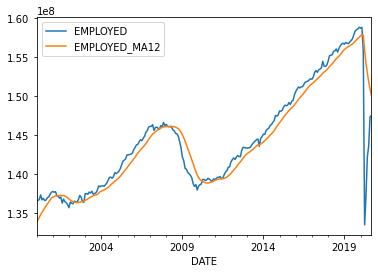

In [25]:
dfNew = df[df['DATE'] >= '2000-01-01']
dfNew.plot(x = 'DATE', y = ['EMPLOYED','EMPLOYED_MA12'])

<b>e) Construct a new column that contains the change in the number of employed month-on-month. Call the column CHANGE_EMP</b>

In [26]:
df['CHANGE_EMP'] = df['EMPLOYED'] - df['EMPLOYED'].shift(1)
df

,DATE,UNRATE,CLF16OV,CIVPART,UNEMPLOYED,EMPLOYED,EMPLOYED_MA12,CHANGE_EMP
0,1948-01-01,3.4,60095000,58.6,2043230.0,58051770.0,NaN,NaN
1,1948-02-01,3.8,60524000,58.9,2299912.0,58224088.0,NaN,172318.0
2,1948-03-01,4.0,60070000,58.5,2402800.0,57667200.0,NaN,-556888.0
3,1948-04-01,3.9,60677000,59.0,2366403.0,58310597.0,NaN,643397.0
4,1948-05-01,3.5,59972000,58.3,2099020.0,57872980.0,NaN,-437617.0
...,...,...,...,...,...,...,...,...
868,2020-05-01,13.3,158227000,60.8,21044191.0,137182809.0,1.541926e+08,3704516.0
869,2020-06-01,11.1,159932000,61.5,17752452.0,142179548.0,1.529495e+08,4996739.0
870,2020-07-01,10.2,159870000,61.4,16306740.0,143563260.0,1.518024e+08,1383712.0
871,2020-08-01,8.4,160838000,61.7,13510392.0,147327608.0,1.509272e+08,3764348.0


<b>f) Plot the CHANGE_EMP from 1980 to 2015</b>

<AxesSubplot:xlabel='DATE'>

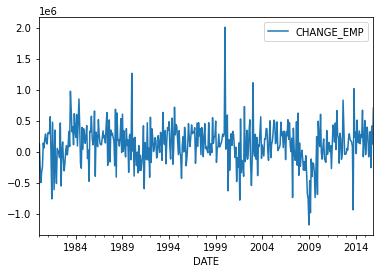

In [27]:
dfNew = df[(df['DATE'] >= '1980-01-01') & (df['DATE'] < '2016-01-01')]
dfNew.plot(x = 'DATE', y = 'CHANGE_EMP')

<b>g) Construct a new column that contains the change in the number of employed from a year ago. Call the column CHANGE_EMP_YOY</b>

In [28]:
df['CHANGE_EMP_YOY'] = df['EMPLOYED'] - df['EMPLOYED'].shift(12)

<b>h) Plot the CHANGE_EMP_YOY from 1980 to 2015</b>

<AxesSubplot:xlabel='DATE'>

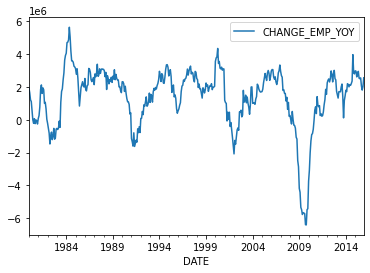

In [29]:
dfNew = df[(df['DATE'] >= '1980-01-01') & (df['DATE'] < '2016-01-01')]
dfNew.plot(x = 'DATE', y = 'CHANGE_EMP_YOY')